In [2]:
from matplotlib import rc, rcParams
from matplotlib.image import NonUniformImage
from matplotlib import cm, ticker
from matplotlib.font_manager import FontProperties
import matplotlib
config = {
    "font.family": ["serif", "Times New Roman"],
    "font.size": 20,
    "mathtext.fontset": 'stix',
    "font.serif": ['Computer Modern'],
    "text.latex.preamble": r"\usepackage{amsmath}"
}
rcParams.update(config)
plt.rcParams['axes.formatter.min_exponent'] = 2

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

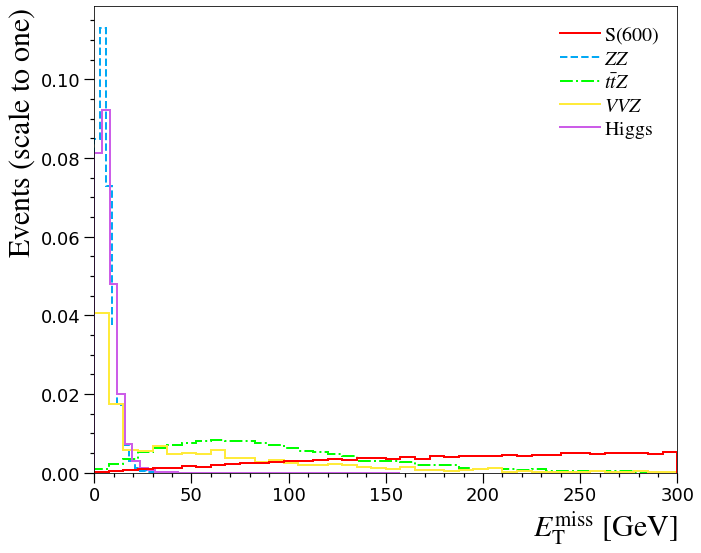

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section,n0):
        super().__init__(label,color,cross_section,n0)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('zz600','r',8.32614E-05,100000)
sgn.data = cut(pd.read_csv('zz600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['bkg_ggh'] = Bkg('ggh','#CC5DE8',0.0004472)
bkgs['bkg_vvz'] = Bkg('vvz','#FFEB3B',0.1349)
bkgs['bkg_ttz_50W'] = Bkg('ttz','#00FF00',0.008099,n0=500000)
bkgs['bkg_llll'] = Bkg('llll','#03A9F4',0.02643)

for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'ET_miss'
set_bins = 40
set_range = (0.,300.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,300.)

ax.hist(bkgs['bkg_llll'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_llll'].color,
            histtype='step',density=True,linewidth=2.0,ls='--')

ax.hist(bkgs['bkg_ttz_50W'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ttz_50W'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0,ls='-.')


ax.hist(bkgs['bkg_vvz'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_vvz'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0)

ax.hist(bkgs['bkg_ggh'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ggh'].color,
            histtype='step',density=True,linewidth=2.0)

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2.0)

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
llll_line = mlines.Line2D([], [], color=bkgs['bkg_llll'].color, linewidth=2,label=r'$ZZ$',ls='--')
ttz_line = mlines.Line2D([], [], color=bkgs['bkg_ttz_50W'].color, linewidth=2,label=r'$t \bar{t} Z$',ls='-.')
vvz_line = mlines.Line2D([], [], color=bkgs['bkg_vvz'].color,linewidth=2,label=r'$VVZ$')
ggh_line = mlines.Line2D([], [], color=bkgs['bkg_ggh'].color, linewidth=2,label=r'${\rm Higgs}$')

# plt.legend(handles=[sgn_line,tt_line,vvz_line,ggh_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,llll_line,ttz_line,vvz_line,ggh_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=1,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$E_{\rm T}^{\rm miss}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both',labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('ZZ_ET.png')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

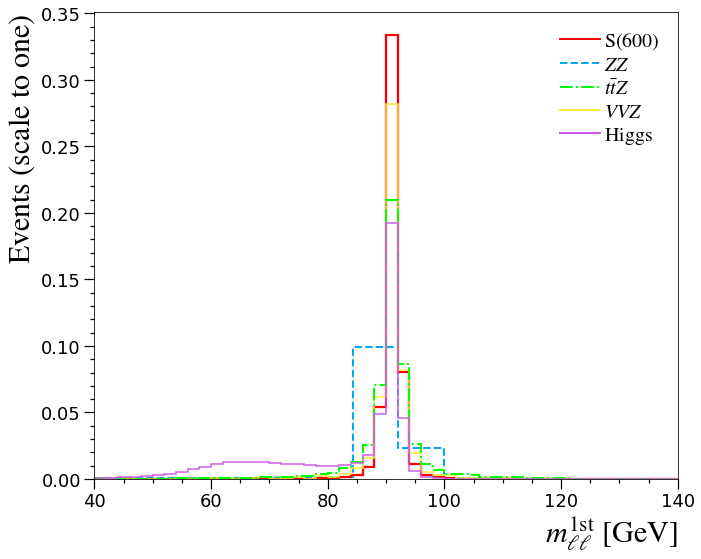

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section,n0):
        super().__init__(label,color,cross_section,n0)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('zz600','r',8.32614E-05,100000)
sgn.data = cut(pd.read_csv('zz600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['bkg_ggh'] = Bkg('ggh','#CC5DE8',0.0004472)
bkgs['bkg_vvz'] = Bkg('vvz','#FFEB3B',0.1349)
bkgs['bkg_ttz_50W'] = Bkg('ttz','#00FF00',0.008099,n0=500000)
bkgs['bkg_llll'] = Bkg('llll','#03A9F4',0.02643)

for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'mll1'
set_bins = 50
set_range = (40.,140.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(40.,140.)

ax.hist(bkgs['bkg_llll'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_llll'].color,
            histtype='step',density=True,linewidth=2.0,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=2.25)

ax.hist(bkgs['bkg_vvz'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_vvz'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)

ax.hist(bkgs['bkg_ttz_50W'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ttz_50W'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0,ls='-.')

ax.hist(bkgs['bkg_ggh'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ggh'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)



sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
llll_line = mlines.Line2D([], [], color=bkgs['bkg_llll'].color, linewidth=2,label=r'$ZZ$',ls='--')
ttz_line = mlines.Line2D([], [], color=bkgs['bkg_ttz_50W'].color, linewidth=2,label=r'$t \bar{t} Z$',ls='-.')
vvz_line = mlines.Line2D([], [], color=bkgs['bkg_vvz'].color,linewidth=2,label=r'$VVZ$')
ggh_line = mlines.Line2D([], [], color=bkgs['bkg_ggh'].color, linewidth=2,label=r'${\rm Higgs}$')

# plt.legend(handles=[sgn_line,tt_line,vvz_line,ggh_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,llll_line,ttz_line,vvz_line,ggh_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=1,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$m_{\ell \ell}^{\rm 1st}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both',labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('ZZ_mll1.png')

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'serif' n

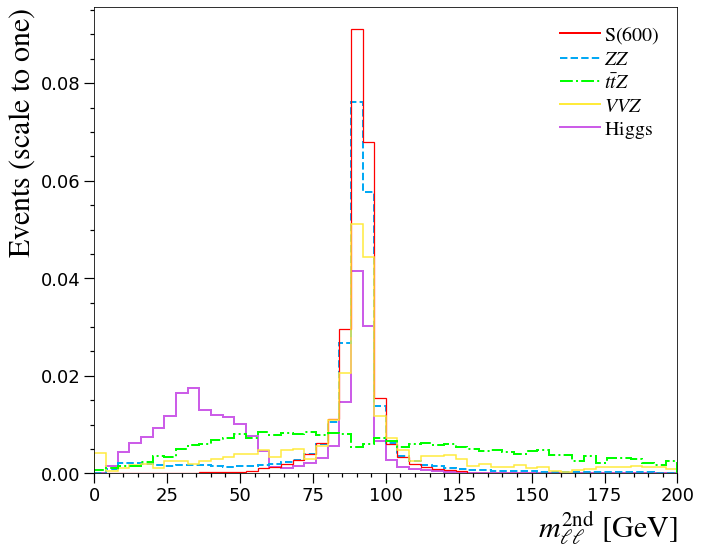

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import matplotlib.lines as mlines
from collections import OrderedDict

class Bkg:
    def __init__(self,label,color,cross_section,n0=1000000):
    #截面单位pb,亮度单位fb^(-1),n0表示最开始产生的事例数
        self.label = label
        self.color = color
        self.cross_section = cross_section
        self.data = []
        self.n0 = n0
        self.luminosity = 3000
    def scale(self):
        return(1000*self.cross_section*self.luminosity/self.n0)
    def n_events(self):
        return(self.data.shape[0]*self.scale())

class Sgn(Bkg):
    def __init__(self,label,color,cross_section,n0):
        super().__init__(label,color,cross_section,n0)
        
def cut(data0):
    return(data0.loc[(data0['ET_miss'] > 0)]) 

#信号
sgn = Sgn('zz600','r',8.32614E-05,100000)
sgn.data = cut(pd.read_csv('zz600.csv'))

# 定义一些背景
bkgs = OrderedDict()
bkgs['bkg_ggh'] = Bkg('ggh','#CC5DE8',0.0004472)
bkgs['bkg_vvz'] = Bkg('vvz','#FFEB3B',0.1349)
bkgs['bkg_ttz_50W'] = Bkg('ttz','#00FF00',0.008099,n0=500000)
bkgs['bkg_llll'] = Bkg('llll','#03A9F4',0.02643)

for bkg in bkgs.keys():
    bkgs[bkg].data = cut(pd.read_csv(bkg+'.csv'))

picture = 'mll2'
set_bins = 50
set_range = (0.,200.)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.16, 0.16, 0.81, 0.81])
ax.set_xlim(0.,200.)

ax.hist(bkgs['bkg_ggh'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ggh'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0)

ax.hist(bkgs['bkg_llll'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_llll'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0,ls='--')

ax.hist(sgn.data[picture],bins=set_bins,edgecolor=sgn.color,range=set_range,
            histtype='step',density=True,linewidth=1.25)

ax.hist(bkgs['bkg_vvz'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_vvz'].color,range=set_range,
            histtype='step',density=True,linewidth=1.5)

ax.hist(bkgs['bkg_ttz_50W'].data[picture], bins=set_bins,edgecolor=bkgs['bkg_ttz_50W'].color,range=set_range,
            histtype='step',density=True,linewidth=2.0,ls='-.')

sgn_line = mlines.Line2D([], [], color=sgn.color, linewidth=2,label=r'${\rm S(600)}$')
llll_line = mlines.Line2D([], [], color=bkgs['bkg_llll'].color, linewidth=2,label=r'$ZZ$',ls='--')
ttz_line = mlines.Line2D([], [], color=bkgs['bkg_ttz_50W'].color, linewidth=2,label=r'$t \bar{t} Z$',ls='-.')
vvz_line = mlines.Line2D([], [], color=bkgs['bkg_vvz'].color,linewidth=2,label=r'$VVZ$')
ggh_line = mlines.Line2D([], [], color=bkgs['bkg_ggh'].color, linewidth=2,label=r'${\rm Higgs}$')

# plt.legend(handles=[sgn_line,tt_line,vvz_line,ggh_line,diboson_line,singlet_line,ttx_line])
ax.legend(
    handles=[sgn_line,llll_line,ttz_line,vvz_line,ggh_line],
    loc='upper right',
    bbox_to_anchor=(1,1),
    ncol=1,
    fontsize=20,
    handlelength=2,
    handletextpad=0.2,
    labelspacing=0.2,
    columnspacing=1,
    frameon= False
)

ax.set_xlabel(r"$m_{\ell \ell}^{\rm 2nd}~[{\rm GeV}]$", fontsize=30, loc='right')
ax.set_ylabel(r"${\rm Events~(scale~to~one)}$", fontsize=30, loc='top')

plt.minorticks_on()
ax.tick_params(which='both',labelsize=18)
ax.tick_params(which="major", length=10, width=1.2)
ax.tick_params(which="minor", length=4, width=1.2) 

plt.savefig('ZZ_mll2.png')